# Linear Regression - Cách 1: Giải phương trình bậc nhất

a = 18.300035009574174
b = 6.993023315502459


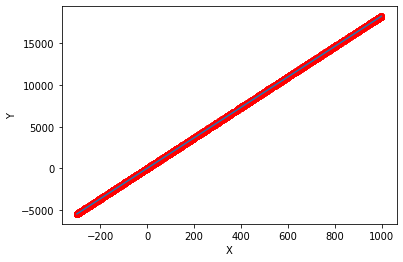

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#--------------- enter value X, Y -----------
#X = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
#Y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

#X = np.random.rand(1000, 1)
#Y = 5 + 4.3 * X + .2*np.random.randn(1000, 1) # noise added

#X = np.random.uniform(-500.0, 700.0, 1000)
#Y = 5 + 4.3 * X + .2*np.random.uniform(-5.0, 5.0, 1000) # noise added

#X = np.random.randint(-500, 700, size =(1000, 1))
#Y = 5 + 4.3 * X + .2*np.random.normal(0, 0.2, size = (1000, 1)) # noise added

X = np.random.randint(-300, 1000, size =(1300, 1))
Y = 7 + 18.3 * X + np.random.normal(0, 0.5, size = (1300, 1)) # noise added

#----------- start to process -------------
sumX_power2 = np.sum(X ** 2)
sumX = np.sum(X)
n = X.size

sum_x_y =  np.sum(X * Y)
sumY = np.sum(Y)

#Giải phương trình bậc nhất bằng matrix
A = np.array([sumX_power2, sumX, sumX, n ]).reshape(2, 2)
B = np.array([sum_x_y, sumY])
x = np.linalg.solve(A, B)

#
a, b = x
print('a = {}'.format(a))
print('b = {}'.format(b))

#----------------------------------
#
x0 = np.linspace(X.min(), X.max(), 3)
y0 = a*x0 + b

# Drawing the fitting line 
plt.scatter(X,Y, color = 'red')
#array_x = np.arange(0, 2)
#array_y = array_x * a + b
#plt.plot(array_x, array_y)


plt.plot(X, Y, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
#plt.axis([140, 190, 45, 75])



plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Cách 2: Giải phương trình theo ma trận
https://machinelearningcoban.com/2016/12/28/linearregression/

a = 4.29999989559475
b = 14.999584176982466


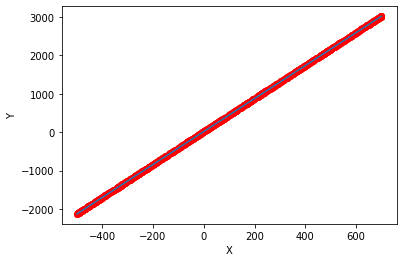

In [234]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#--------------- enter value X, Y -----------
#X = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
#Y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

X = np.random.randint(-500, 700, size =(1000, 1))
Y = 15 + 4.3 * X + .2*np.random.normal(0, 0.5, size = (1000, 1)) # noise added


#----------- start to process -------------
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, Y)
w = np.dot(np.linalg.pinv(A), b)
#print('w = ', w)

w0, w1 =  w[0][0], w[1][0] 
print('a = {}'.format(w1))
print('b = {}'.format(w0))


# Preparing the fitting line 
#w_0 = w[0][0]
#w_1 = w[1][0]
x0 = np.linspace(X.min(), X.max(), 3)
y0 = w0 + w1*x0

# Drawing the fitting line 
plt.scatter(X,Y, color = 'red')
#array_x = np.arange(0, 2)
#array_y = array_x * a + b
#plt.plot(array_x, array_y)

#plt.plot(X.T, Y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
#plt.axis([140, 190, 45, 75])

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Cách 3: Sử dụng sklearn
https://machinelearningcoban.com/2016/12/28/linearregression/

Solution found by scikit-learn  :  [[ 6.98706432 18.30004428]]
a = 18.30004428249025
b = 6.987064319198334


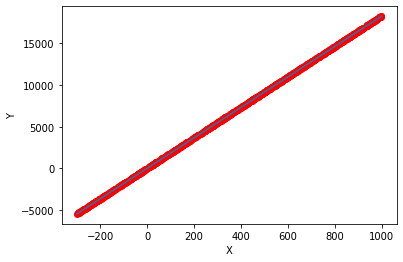

In [22]:
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#--------------- enter value X, Y -----------
#X = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
#Y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

#X = np.random.randint(-500, 700, size =(1000, 1))
#Y = 5 + 4.3 * X + .2*np.random.normal(0, 0.5, size = (1000, 1)) # noise added

X = np.random.randint(-300, 1000, size =(1000, 1))
Y = 7 + 18.3 * X + np.random.normal(0, 0.5, size = (1000, 1)) # noise added

#----------- start to process -------------
X = X.reshape(-1, 1) #convert to columns
Y = Y.reshape(-1, 1) #convert to columns

# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)


# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, Y)


# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )

w0, w1 =  regr.coef_[0][0], regr.coef_[0][1]
print('a = {}'.format(w1))
print('b = {}'.format(w0))


# Preparing the fitting line 
x0 = np.linspace(X.min(), X.max(), 3)
y0 = w0 + w1*x0

# Drawing the fitting line 
plt.plot(X, Y, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Cách 4: Sử dụng Gradient Descent cho closed-forms

a = 8.300487152454169
b = -10.643378001598837
Solution found by Gradient Descent: w = -10.643378001598837, 8.300487152454169 after 18 iterations


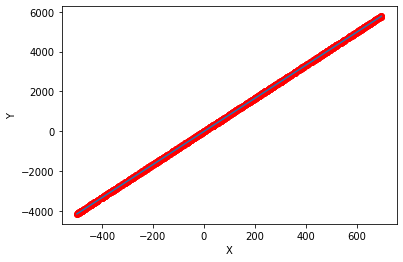

In [133]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#--------------- enter value X, Y here: -----------    
#X = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
#Y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

X = np.random.randint(-500, 700, size =(1000, 1))
Y = -10 + 8.3 * X + np.random.normal(0, 0.5, size = (1000, 1)) # noise added

#X = np.random.randint(-500, 700, size =(1000, 1))
#Y = -45 + 18.43 * X + np.random.normal(0, 0.5, size = (1000, 1)) # noise added

#X = np.random.randint(-300, 1000, size =(1300, 1))
#Y = -8 + 180.3 * X + np.random.normal(0, 0.5, size = (1300, 1)) # noise added

#
#----------- các hàm cần thiết  -------------
# Hàm tìm theta đầu tiên, thường lấy 2 điểm đầu và cuối
def find_init(X, Y):
    x_min_idx  = np.argmin(X)
    x_max_idx = np.argmax(X)
    #
    x1, y1, x2, y2 = X[x_min_idx], Y[x_min_idx], X[x_max_idx], Y[x_max_idx]
    
    z1 = np.array([x1, y1])
    z2 = np.array([x2, y2])
    z3 = z2 - z1
    
    # find a
    w1 = 0.0
    if (z3[0] > 0):
        w1 = z3[1] / z3[0]
        
    #find b
    w0_0 = Y[x_min_idx] - w1*X[x_min_idx]
    w0_1 = Y[x_max_idx] - w1*X[x_max_idx]
    w0 = (w0_0 + w0_1) / 2
    #w0 = np.mean(Y - w1[0]*X)
    
    return w0, w1
    

def f(w):
    N = Xbar.shape[0]
    f = ((np.sum((np.dot(Xbar, w) - Y) ** 2)) * 0.5) / N
    return f

def matrix_grad(w):
    N = Xbar.shape[0]
    df = (np.dot(Xbar.T, (np.dot(Xbar, w) - Y))) / N
    return df


def grad(w):
    return matrix_grad(w)


#----------- start to process -------------
eta = 0.01
NUM_LOOPs = 1000

X = X.reshape(-1, 1) #convert to columns
Y = Y.reshape(-1, 1) #convert to columns
#
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

def find_min_point(w0):
    
    #1. khởi tạo list x
    w = w0.copy()
    ncount = 0
    #2. chạy vòng lặp for (0..NUM_LOOPs)
    for it in range(NUM_LOOPs):
        w_new = w - eta*grad(w) 
        n = abs(np.linalg.norm(grad(w_new)) - np.linalg.norm(grad(w)))
        
        if (n > 1e+10):
            it = NUM_LOOPs # to exit
            break
            
        if (n < 1e-3):
            break
            
        #2.3 copy back    
        w = w_new.copy()
        ncount = ncount + 1
    return (w, it, ncount)

ncount = 0
w0_0, w0_1 = find_init(X, Y)    
w0 = np.array([w0_0, w0_1]).reshape(-1, 1)

for i in range(10):
    (w, it1, count) = find_min_point(w0)
    ncount = ncount + count
    if (it1 >= NUM_LOOPs):
        #try to update learning rate
        eta = eta / 10
    else:    
        break



w0, w1 = w[0][0], w[1][0]

print('a = {}'.format(w1))
print('b = {}'.format(w0))
print('Solution found by Gradient Descent: w = {}, {} after {} iterations'.format(w0, w1, ncount))

# Preparing the fitting line 
x0 = np.linspace(X.min(), X.max(), 3)
y0 = w0 + w1*x0


# Drawing the fitting line 
plt.scatter(X,Y, color = 'red')     # data 
plt.plot(x0, y0)               # the fitting line
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Cách 5: Sử dụng Gradient Descent cho open-form

a = 180.30007515374834
b = -8.045085431564045
Solution found by Gradient Descent: w = -8.045085431564045, 180.30007515374834 after 82 iterations


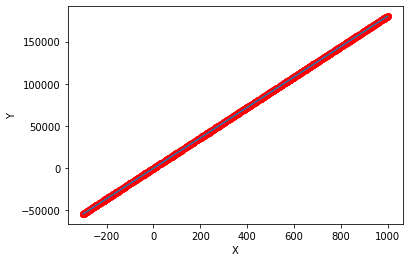

In [141]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#--------------- enter value X, Y here: -----------    
#X = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
#Y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])


#X = np.random.randint(-500, 700, size =(1000, 1))
#Y = -10 + 8.3 * X + np.random.normal(0, 0.5, size = (1000, 1)) # noise added

#X = np.random.randint(-500, 700, size =(1000, 1))
#Y = -45 + 18.43 * X + np.random.normal(0, 0.5, size = (1000, 1)) # noise added

X = np.random.randint(-300, 1000, size =(1300, 1))
Y = -8 + 180.3 * X + np.random.normal(0, 0.5, size = (1300, 1)) # noise added
#
#----------- các hàm cần thiết  -------------
# Hàm tìm theta đầu tiên, thường lấy 2 điểm đầu và cuối
def find_init(X, Y):
    x_min_idx  = np.argmin(X)
    x_max_idx = np.argmax(X)
    #
    x1, y1, x2, y2 = X[x_min_idx], Y[x_min_idx], X[x_max_idx], Y[x_max_idx]
    
    z1 = np.array([x1, y1])
    z2 = np.array([x2, y2])
    z3 = z2 - z1
    
    # find a
    w1 = 0.0
    if (z3[0] > 0):
        w1 = z3[1] / z3[0]
        
    #find b
    w0_0 = Y[x_min_idx] - w1*X[x_min_idx]
    w0_1 = Y[x_max_idx] - w1*X[x_max_idx]
    w0 = (w0_0 + w0_1) / 2
    #w0 = np.mean(Y - w1[0]*X)
    
    return w0, w1
    

def f(w):
    N = Xbar.shape[0]
    f = ((np.sum((np.dot(Xbar, w) - Y) ** 2)) * 0.5) / N
    return f

def numerical_grad(w):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        #
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (f(w_p) - f(w_n))/(2*eps)
    return g 


def grad(w):
    return numerical_grad(w)


#----------- start to process -------------
eta = 0.01      #--> Change here
NUM_LOOPs = 1000  #--> Change here


X = X.reshape(-1, 1) #convert to columns
Y = Y.reshape(-1, 1) #convert to columns
#
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)


def find_min_point(w0):
    #1. khởi tạo list x
    w = w0.copy()
    count = 0
    #2. chạy vòng lặp for (0..NUM_LOOPs)
    
    for it in range(NUM_LOOPs):
        
        w_new = w - eta*grad(w) 
        
        n = abs(np.linalg.norm(grad(w_new)) - np.linalg.norm(grad(w)))
        if (n > 1e+10):
            it = NUM_LOOPs # to exit
            break
            
        if (n < 1e-3):
            break
            
        #2.3 copy back    
        w = w_new.copy()
        count = count + 1
    return (w, it, count)


ncount = 0
w0_0, w0_1 = find_init(X, Y)
w0 = np.array([w0_0, w0_1]).reshape(-1, 1)

for i in range(10):  
    (w, it1, count) = find_min_point(w0)
    
    ncount = ncount + count
    
    if (it1 >= NUM_LOOPs):
        #try to update learning rate
        eta = eta / 10
    else:    
        break


w0, w1 = w[0][0], w[1][0]

print('a = {}'.format(w1))
print('b = {}'.format(w0))
print('Solution found by Gradient Descent: w = {}, {} after {} iterations'.format(w0, w1, ncount))


# Preparing the fitting line 
x0 = np.linspace(X.min(), X.max(), 3)
y0 = w0 + w1*x0


# Drawing the fitting line 
plt.scatter(X,Y, color = 'red')     # data 
plt.plot(x0, y0)               # the fitting line
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Multiple Linear Regression
https://datatofish.com/multiple-linear-regression-python/

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


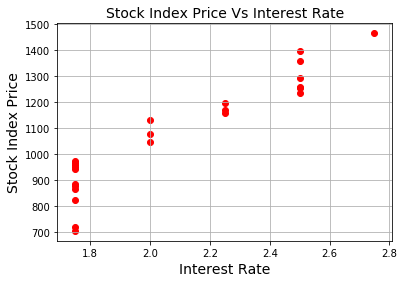

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
  
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
 
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
 
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

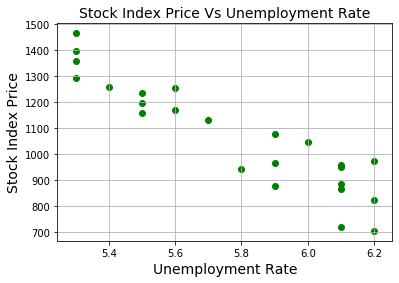

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
  
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
 
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
 
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

# Multiple Linear Regression: using sklearn
https://datatofish.com/multiple-linear-regression-python/

In [227]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock Index Price: 
 [1422.86238865]
                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           4.04e-11
Time:                        22:29:10   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Multiple Linear Regression: giải phương trình ma trận
https://datatofish.com/multiple-linear-regression-python/
https://machinelearningcoban.com/2016/12/28/linearregression/

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X_df = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_df = df['Stock_Index_Price']



#----------- start to process -------------
X = X_df.to_numpy().reshape(-1, 1)
Y = Y_df.to_numpy()

#
nColumns = X_df.shape[1]
X = X.reshape(-1, nColumns)   # 2 variables
Y = Y.reshape(-1, 1)
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, Y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)


w =  [[1798.40397763]
 [ 345.54008701]
 [-250.14657137]]


# Multiple Linear Regression: statsmodels
https://datatofish.com/multiple-linear-regression-python/

In [231]:
import pandas as pd
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           4.04e-11
Time:                        22:34:40   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

# House Prices: Advanced Regression Techniques
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
<h2>Chọn 2-3 columns tính giá nhà</h2>
File descriptions
train.csv - the training set
test.csv - the test set
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

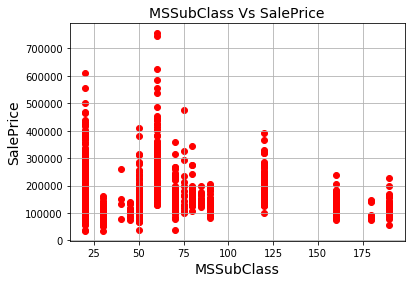

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read file
df_train = pd.read_csv('train.csv')


X_df = df_train[['MSSubClass', 'LotArea']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_df = df_train['SalePrice']


plt.scatter(df_train['MSSubClass'], df_train['SalePrice'], color='red')
plt.title('MSSubClass Vs SalePrice', fontsize=14)
plt.xlabel('MSSubClass', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.grid(True)
plt.show()
#
df_train.head()

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read file
df_train = pd.read_csv('train.csv')
#df_train.head()

X_df = df_train[['MSSubClass', 'LotArea']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_df = df_train['SalePrice']


#----------- start to process -------------
X = X_df.to_numpy().reshape(-1, 1)
Y = Y_df.to_numpy()

#
nColumns = X_df.shape[1]
X = X.reshape(-1, nColumns)   # 2 variables
Y = Y.reshape(-1, 1)
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, Y)
w = np.dot(np.linalg.pinv(A), b)

#
print('w = ', w)
w0 = w[0][0]
w1 = w[1][0]
w2 = w[2][0]
print(w0)

#SalePrice = w0 + w1 * MSSubClass + w2 * LotArea
# prediction id 1461
Test_MSSubClass = np.array([20,20,60,60,120,60,20,60,20,20,120])
Test_LotArea = np.array([11622,14267,13830,9978,5005,10000,7980,8402,10176,8400,5858])
SalePrice = w0 + w1 * Test_MSSubClass + w2 * Test_LotArea
output_df = pd.DataFrame(Test_MSSubClass, columns = ['Test_MSSubClass']) #, Test_LotArea, SalePrice, , 'Test_LotArea', 'SalePrice'
output_df['Test_LotArea'] = Test_LotArea
output_df['SalePrice'] = SalePrice
output_df


#print ('Predicted SalePrice Price: \n', SalePrice) #186532.87965517282


w =  [[ 1.64568165e+05]
 [-9.08007943e+01]
 [ 2.04618230e+00]]
164568.16479342652


,Test_MSSubClass,Test_LotArea,SalePrice
0,20,11622,186532.879655
1,20,14267,191945.031852
2,60,13830,187418.818411
3,60,9978,179536.924172
4,120,5005,163913.211909
5,60,10000,179581.940183
6,20,7980,179080.683700
7,60,8402,176312.140859
8,20,10176,183574.100042
9,20,8400,179940.080268


# House Prices: sử dụng sklearn

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#read file
df_train = pd.read_csv('train.csv')
#df_train.head()

X_df = df_train[['MSSubClass', 'LotArea']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_df = df_train['SalePrice']


#----------- start to process -------------
X = X_df.copy()
Y = Y_df.copy()
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
print(w0)

#SalePrice = w0 + w1 * MSSubClass + w2 * LotArea
# prediction id 1461
Test_MSSubClass = np.array([20,20,60,60,120,60,20,60,20,20,120])
Test_LotArea = np.array([11622,14267,13830,9978,5005,10000,7980,8402,10176,8400,5858])
SalePrice = w0 + w1 * Test_MSSubClass + w2 * Test_LotArea
output_df = pd.DataFrame(Test_MSSubClass, columns = ['Test_MSSubClass']) #, Test_LotArea, SalePrice, , 'Test_LotArea', 'SalePrice'
output_df['Test_LotArea'] = Test_LotArea
output_df['SalePrice'] = SalePrice
output_df





Intercept: 
 164568.1647906469
Coefficients: 
 [-90.80079432   2.04618231]
164568.1647906469


,Test_MSSubClass,Test_LotArea,SalePrice
0,20,11622,186532.879654
1,20,14267,191945.031851
2,60,13830,187418.818411
3,60,9978,179536.924171
4,120,5005,163913.211909
5,60,10000,179581.940182
6,20,7980,179080.683699
7,60,8402,176312.140859
8,20,10176,183574.100041
9,20,8400,179940.080267
